Import the Libraries

In [9]:
import tensorflow as tf
from pathlib import Path
import cv2
from PIL import Image
import os
import shutil

Give the required GPU space for tensorflow

In [11]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [13]:
gpus

[]

Data_dir is the collection of Happy and Sad images
datad is the folder used to store the filtered images

In [15]:
data_dir='datacat'
image_exts=['jpeg','png','jpg']
datad='filterimagecat'

filter from the correpted images

In [14]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        if '.ipynb_checkpoints' not in image_path:
            print(image)
            img=cv2.imread(image_path)
            img1=Image.open(image_path)
            tip=img1.format.lower()
            print(tip)
            if tip in image_exts:
                print("ok")
                source=Path(f'{data_dir}/{image_class}/{image}')
                print("jo")
                destination=Path(f'{datad}/{image_class}/{image}')
                print("bka")
                shutil.copy(source,destination)
                print("bot")
                print(f"Image moved successfully!{image}")
data_dir='filterimage'

Cat
1.png
png
ok
jo
bka
bot
Image moved successfully!1.png
10.png
png
ok
jo
bka
bot
Image moved successfully!10.png
100.png
png
ok
jo
bka
bot
Image moved successfully!100.png
101.png
png
ok
jo
bka
bot
Image moved successfully!101.png
102.png
png
ok
jo
bka
bot
Image moved successfully!102.png
103.png
png
ok
jo
bka
bot
Image moved successfully!103.png
104.png
png
ok
jo
bka
bot
Image moved successfully!104.png
105.png
png
ok
jo
bka
bot
Image moved successfully!105.png
106.png
png
ok
jo
bka
bot
Image moved successfully!106.png
107.png
png
ok
jo
bka
bot
Image moved successfully!107.png
108.png
png
ok
jo
bka
bot
Image moved successfully!108.png
109.png
png
ok
jo
bka
bot
Image moved successfully!109.png
11.png
png
ok
jo
bka
bot
Image moved successfully!11.png
110.png
png
ok
jo
bka
bot
Image moved successfully!110.png
111.png
png
ok
jo
bka
bot
Image moved successfully!111.png
112.png
png
ok
jo
bka
bot
Image moved successfully!112.png
113.png
png
ok
jo
bka
bot
Image moved successfully!113.png
1

In [17]:
data_dir='filterimagecat'

In [19]:
imgg=cv2.imread(os.path.join(data_dir,'Cat','1.png'))
print(imgg)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[195 193 194]
  [197 195 195]
  [198 196 196]
  ...
  [132 120 120]
  [135 123 123]
  [130 118 118]]

 [[193 190 191]
  [195 193 193]
  [197 195 195]
  ...
  [133 121 121]
  [134 122 122]
  [129 117 117]]

 [[187 185 185]
  [190 188 188]
  [192 190 190]
  ...
  [131 119 119]
  [130 118 118]
  [126 114 114]]]


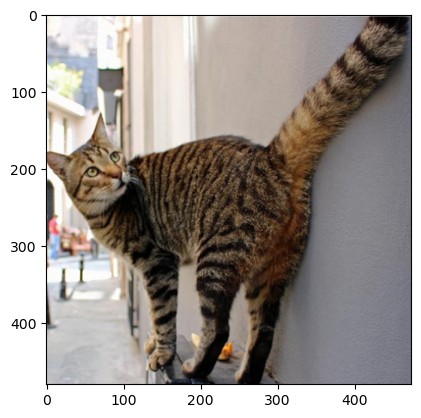

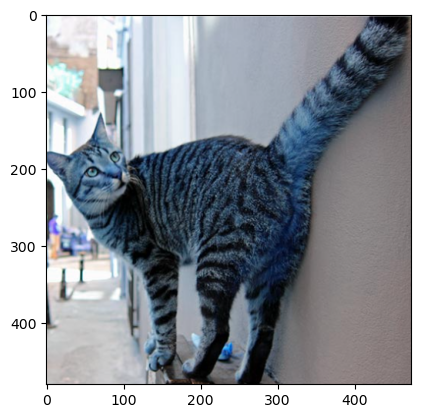

In [21]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(imgg,cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(imgg)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data=tf.keras.utils.image_dataset_from_directory('filterimagecat',batch_size=20,image_size=(128,128))

Found 384 files belonging to 2 classes.


In [27]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

In [29]:
batch

(array([[[[137.51562 , 106.515625, 111.515625],
          [132.30078 , 101.30078 , 106.30078 ],
          [135.58398 , 106.583984, 110.33203 ],
          ...,
          [178.03906 , 200.54297 , 224.16504 ],
          [172.54688 , 191.75    , 215.75    ],
          [183.87012 , 199.60449 , 224.7373  ]],
 
         [[148.45801 , 116.45801 , 120.95801 ],
          [141.4961  , 111.49609 , 113.49609 ],
          [136.29785 , 107.17383 , 108.2959  ],
          ...,
          [170.76562 , 193.26953 , 216.72559 ],
          [174.79688 , 194.      , 217.69922 ],
          [170.49121 , 186.79199 , 209.3584  ]],
 
         [[152.3164  , 122.3584  , 124.5     ],
          [149.42285 , 120.17285 , 122.17285 ],
          [144.41602 , 115.916016, 115.166016],
          ...,
          [179.40625 , 201.91016 , 223.49414 ],
          [173.52051 , 192.72363 , 214.42285 ],
          [176.0127  , 192.31348 , 212.87988 ]],
 
         ...,
 
         [[118.43848 , 124.43848 , 114.43848 ],
          [103.581

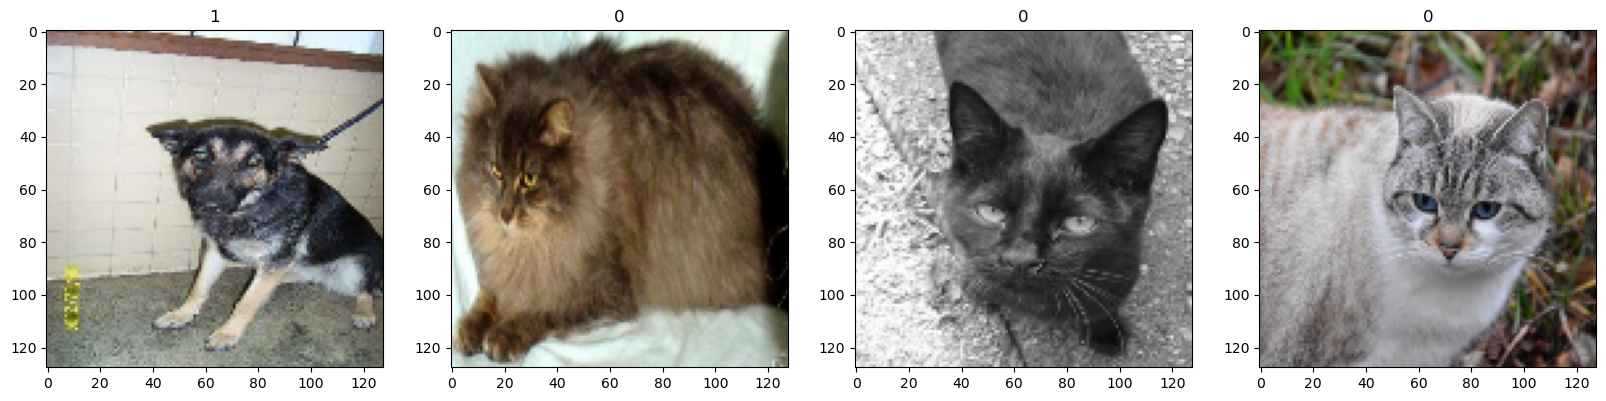

In [31]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [33]:
data=data.map(lambda x,y:(x/255,y))
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()
batch[0].max()

1.0

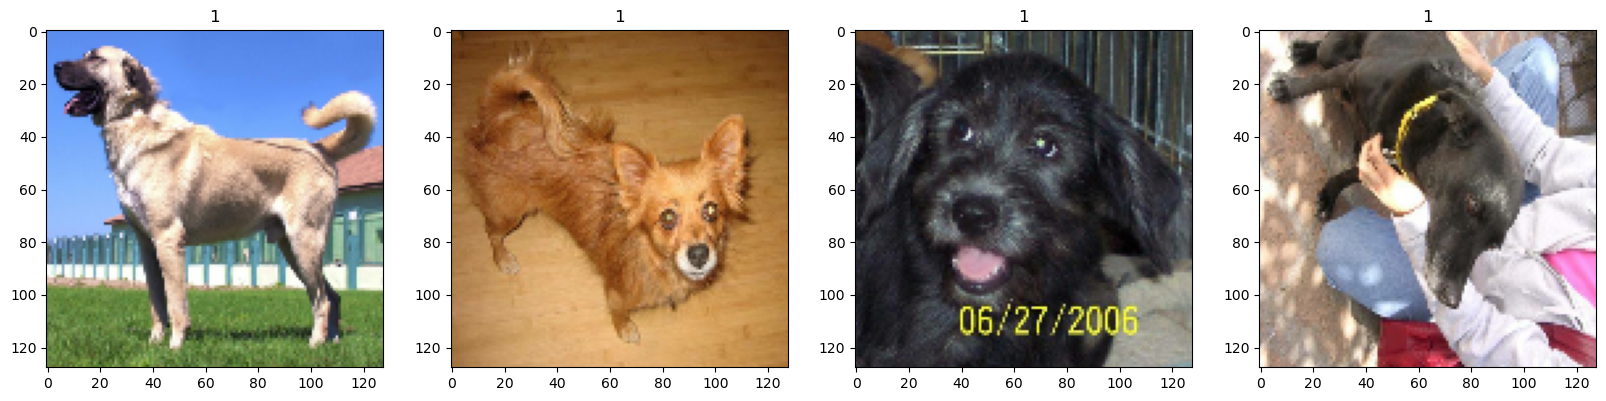

In [35]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [37]:
len(data)

20

In [39]:
train_size=int(len(data)*.5)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [41]:
train_size+val_size+test_size

18

In [43]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [45]:
len(train)

10

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [49]:
model=Sequential()

In [51]:
model.add(Conv2D(16,(3,3),1,activation='relu'))
print("done")
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(14400))

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print("done")

done
done


In [53]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
logdir='logs'

In [59]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
hist = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 603ms/step - accuracy: 0.5369 - loss: 1.3358 - val_accuracy: 0.6100 - val_loss: 0.6546
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 566ms/step - accuracy: 0.6296 - loss: 0.6134 - val_accuracy: 0.6400 - val_loss: 0.6261
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 553ms/step - accuracy: 0.7586 - loss: 0.5826 - val_accuracy: 0.6700 - val_loss: 0.6276
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 544ms/step - accuracy: 0.7896 - loss: 0.4741 - val_accuracy: 0.7400 - val_loss: 0.5480
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 544ms/step - accuracy: 0.8909 - loss: 0.3691 - val_accuracy: 0.8500 - val_loss: 0.4547
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 568ms/step - accuracy: 0.8750 - loss: 0.3554 - val_accuracy: 0.8300 - val_loss: 0.4386
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 632ms/step - accuracy: 0.9315 - loss: 0.2055 - val_accuracy: 0.7900 - val_loss: 0.4716
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 583ms/step - accuracy: 0.9025 - loss: 0.2490 - val_accuracy:

In [63]:
hist.history

{'accuracy': [0.5450000166893005,
  0.6600000262260437,
  0.7250000238418579,
  0.7200000286102295,
  0.8299999833106995,
  0.8600000143051147,
  0.8849999904632568,
  0.8700000047683716,
  0.8899999856948853,
  0.8999999761581421,
  0.8849999904632568,
  0.9150000214576721,
  0.925000011920929,
  0.9150000214576721,
  0.9200000166893005,
  0.9300000071525574,
  0.9549999833106995,
  0.9549999833106995,
  0.9350000023841858,
  0.9900000095367432],
 'loss': [1.0678074359893799,
  0.6328045129776001,
  0.5986192226409912,
  0.559939444065094,
  0.4213334619998932,
  0.38180047273635864,
  0.262613981962204,
  0.3309454023838043,
  0.27725744247436523,
  0.25678399205207825,
  0.293239027261734,
  0.19925402104854584,
  0.1722334623336792,
  0.1932365447282791,
  0.14881639182567596,
  0.22650146484375,
  0.1630115956068039,
  0.12894295156002045,
  0.1410323977470398,
  0.04770790413022041],
 'val_accuracy': [0.6100000143051147,
  0.6399999856948853,
  0.6700000166893005,
  0.74000000953

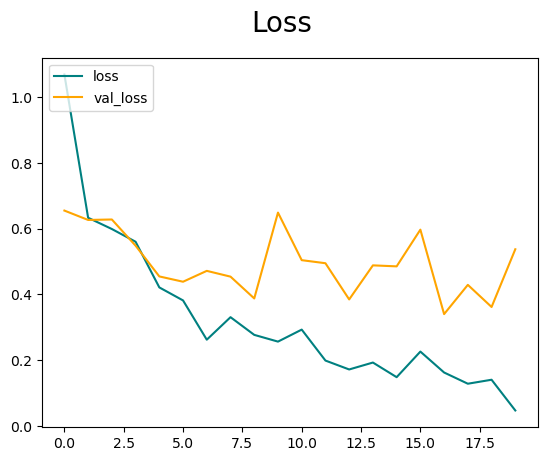

In [65]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt. show()

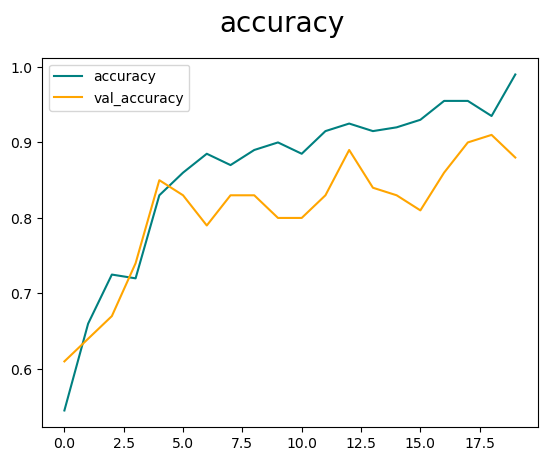

In [67]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt. show()

In [69]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [71]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [75]:
print(pre.result().numpy())
print(re.result().numpy())
print(acc.result().numpy())

0.8235294
0.9032258
0.85


In [77]:
import cv2

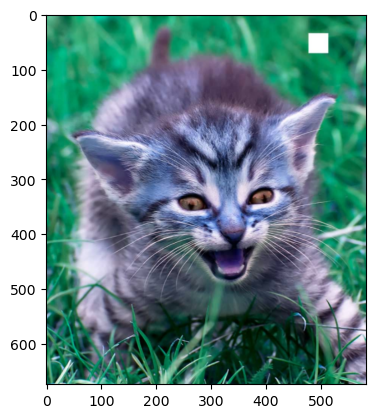

In [83]:
img=cv2.imread('2.png')
plt.imshow(img)
plt.show()

In [85]:
resize=tf.image.resize(img,(128,128))

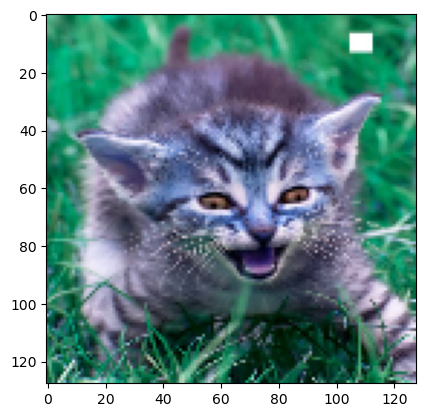

In [87]:
plt.imshow(resize.numpy().astype(int))
plt.show()

In [89]:
np.expand_dims(resize,0)

array([[[[ 89.77734   , 196.51172   , 153.51172   ],
         [100.06641   , 199.44644   , 157.44644   ],
         [ 93.546875  , 189.2963    , 151.07422   ],
         ...,
         [ 34.08261   , 156.97598   , 110.995514  ],
         [ 21.88507   , 159.9559    , 112.        ],
         [ 11.970428  , 163.41574   , 113.08984   ]],

        [[ 87.29019   , 185.98047   , 143.98047   ],
         [ 93.19922   , 186.13672   , 145.13672   ],
         [ 91.02301   , 180.09116   , 143.28473   ],
         ...,
         [ 47.83203   , 155.19489   , 112.12674   ],
         [ 26.522919  , 153.        , 106.33203   ],
         [  0.46762085, 151.25      , 100.55972   ]],

        [[ 78.33594   , 177.5586    , 135.5586    ],
         [ 79.67578   , 172.78732   , 131.78732   ],
         [ 78.53226   , 166.64554   , 126.64554   ],
         ...,
         [ 51.961945  , 155.03717   , 115.47467   ],
         [ 42.983063  , 151.9961    , 112.880646  ],
         [ 31.99942   , 149.76953   , 114.64844   ]],

In [91]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


In [93]:
yhat

array([[1.1643057e-06]], dtype=float32)

In [95]:
if yhat>=0.5:
    print('Given image is dog')
else:
    print('Given image is cat')

Given image is cat
